In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv("C:\\Users\\hp\\OneDrive\\Documents\\naresh IT\\Data sets\\matches.csv")
print(matches.head())
deliveries = pd.read_csv("C:\\Users\\hp\\OneDrive\\Documents\\naresh IT\\Data sets\\deliveries.csv")
print(deliveries.head())

   season             team1                     team2        date  \
0    2024            Canada  United States of America  2024/06/01   
1    2024  Papua New Guinea               West Indies  2024/06/02   
2    2024              Oman                   Namibia  2024/06/02   
3    2024         Sri Lanka              South Africa  2024/06/03   
4    2024       Afghanistan                    Uganda  2024/06/03   

   match_number                                        venue        city  \
0             1                        Grand Prairie Stadium      Dallas   
1             2                           Providence Stadium  Providence   
2             3                              Kensington Oval  Bridgetown   
3             4  Nassau County International Cricket Stadium    New York   
4             5                           Providence Stadium  Providence   

                toss_winner toss_decision   player_of_match         umpire1  \
0  United States of America         field       A

In [3]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [8]:
matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'),'winner'] = matches.loc[(matches['team1']=='Oman')& (matches['team2']=='Namibia'),'winner'].fillna('Namiba')


In [11]:
matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'] = matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'].fillna('United States of America')

In [13]:
print(matches.shape)
print(deliveries.shape)

(52, 18)
(11472, 22)


In [14]:
win_count = matches['winner'].value_counts()

max_wins = win_count.max()
teams_with_most_wins = win_count[win_count == max_wins].index.tolist()

teams_str = ", ".join(teams_with_most_wins)
print(F"teams with the most wins : {teams_str} ({max_wins} wins)")

teams with the most wins : South Africa, India (8 wins)


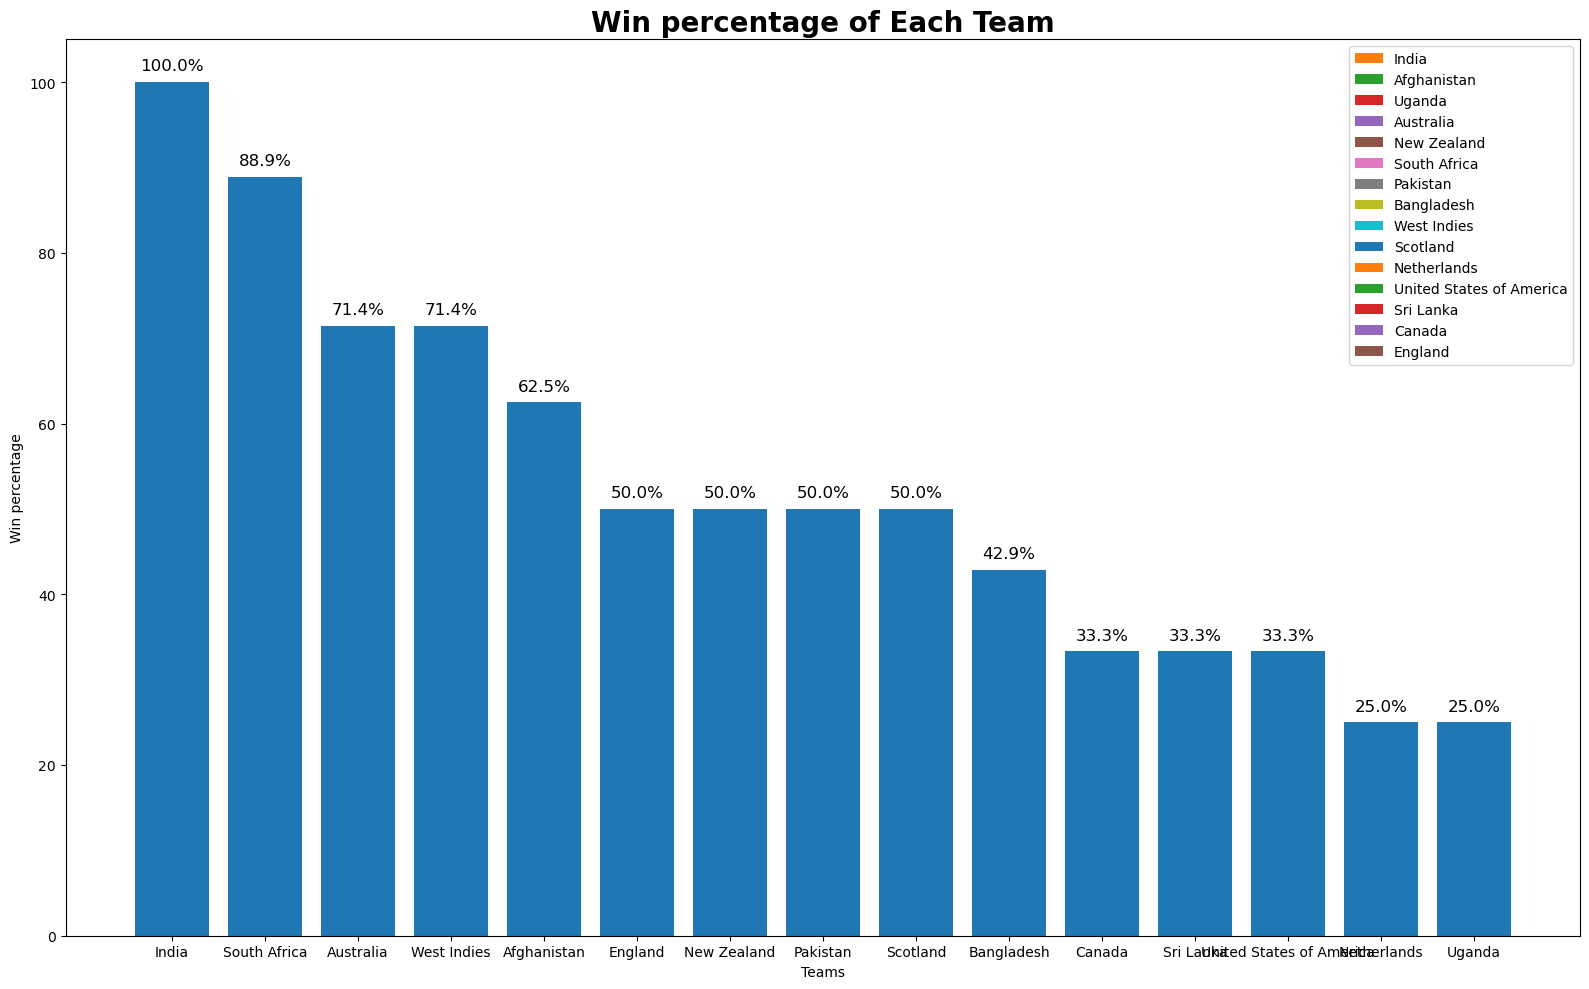

In [21]:
all_teams = pd.concat([matches['team1'],matches['team2']])

total_matches = all_teams.value_counts()

team_wins = matches['winner'].value_counts()

win_percentage = (team_wins / total_matches)*100

win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted = win_percentage_sorted[win_percentage_sorted > 0]

nation_colors = {'India': 'blue',
                'Afghanistan': 'blue',
                'Uganda': 'yellow',
                'Australia': 'yellow',
                'New Zealand': 'black',
                'South Africa': 'darkgreen',
                'Pakistan': 'darkgreen',
                'Bangladesh': 'darkgreen',
                'West Indies': 'red',
                'Scotland': 'purple',
                'Netherlands': 'orange',
                'United States of America': 'pink',
                'Sri Lanka': 'darkblue',
                'Canada': 'red',
                'England': 'red'
}
colors = [nation_colors.get(team,'Black') for team in win_percentage_sorted.index]

plt.figure(figsize=(16,10))

bars = plt.bar(win_percentage_sorted.index , win_percentage_sorted)

plt.xlabel('Teams')

plt.ylabel('Win percentage')

plt.title('Win percentage of Each Team',fontsize=20,weight='bold')

for bar,percentage in zip(bars,win_percentage_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1,f'{percentage:.1f}%',ha='center',va='bottom',fontsize=12)

lengend_handles = []
for team , color in nation_colors.items():
    if team in win_percentage_sorted.index:
        lengend_handles.append(plt.bar([team],[0]))

plt.legend(lengend_handles,nation_colors.keys())

plt.tight_layout()
plt.show()

In [25]:
toss_match_outcome = matches[matches['toss_winner'] == matches['winner']]

toss_win_and_match_win_count = toss_match_outcome.shape[0]
total_matches_count = matches.shape[0]

print(f"Toss winner also won the match {toss_win_and_match_win_count} time out of {total_matches_count}matches.")

Toss winner also won the match 27 time out of 52matches.


In [26]:
venue_wins = matches.groupby('venue')['winner'].value_counts().sort_values(ascending=False)

most_common_venue = venue_wins.idxmax()[0]

print(f"The most common venue for winning: {most_common_venue}")

The most common venue for winning: Nassau County International Cricket Stadium


In [27]:
chosen_to_bat = matches[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner'])]
chosen_to_field = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])]

batting_win_percentage = (chosen_to_bat.shape[0] / matches.shape[0]) * 100
fielding_win_percentage = (chosen_to_field.shape[0] / matches.shape[0]) * 100

print(f"Percentage of wins after choosing to bat: {batting_win_percentage:.2f}%")
print(f"Percentage of wins after choosing to field: {fielding_win_percentage:.2f}%")

Percentage of wins after choosing to bat: 9.62%
Percentage of wins after choosing to field: 42.31%


In [28]:
batting_first = matches[matches['toss_decision'] == 'bat']
chasing_target = matches[matches['toss_decision'] == 'field']

batting_first_win_percentage = (batting_first[batting_first['winner'] == batting_first['team1']].shape[0] / batting_first.shape[0]) * 100
chasing_win_percentage = (chasing_target[chasing_target['winner'] == chasing_target['team2']].shape[0] / chasing_target.shape[0]) * 100

print(f"Win percentage batting first: {batting_first_win_percentage:.2f}%")
print(f"Win percentage chasing target: {chasing_win_percentage:.2f}%")

Win percentage batting first: 50.00%
Win percentage chasing target: 52.38%


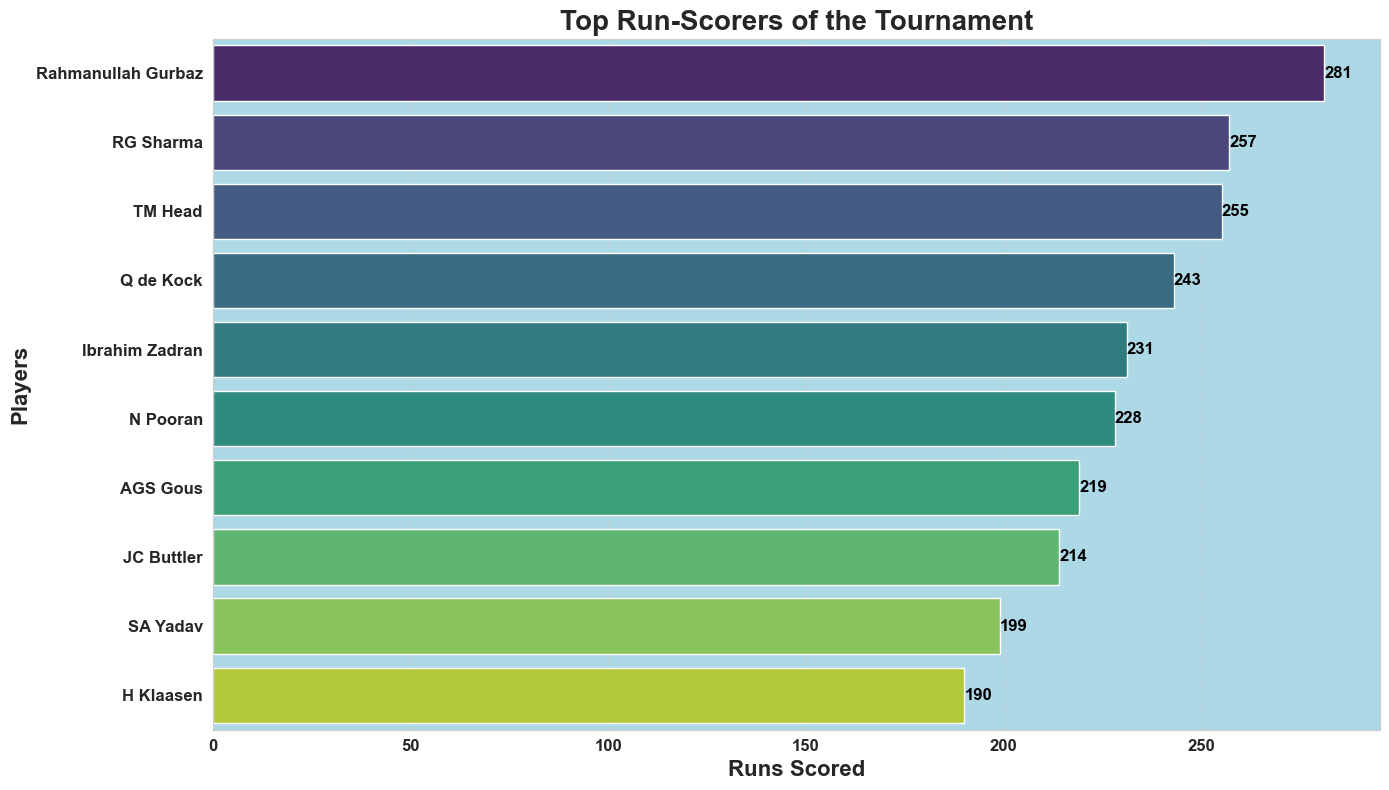

In [29]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette='viridis')
plt.title('Top Run-Scorers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


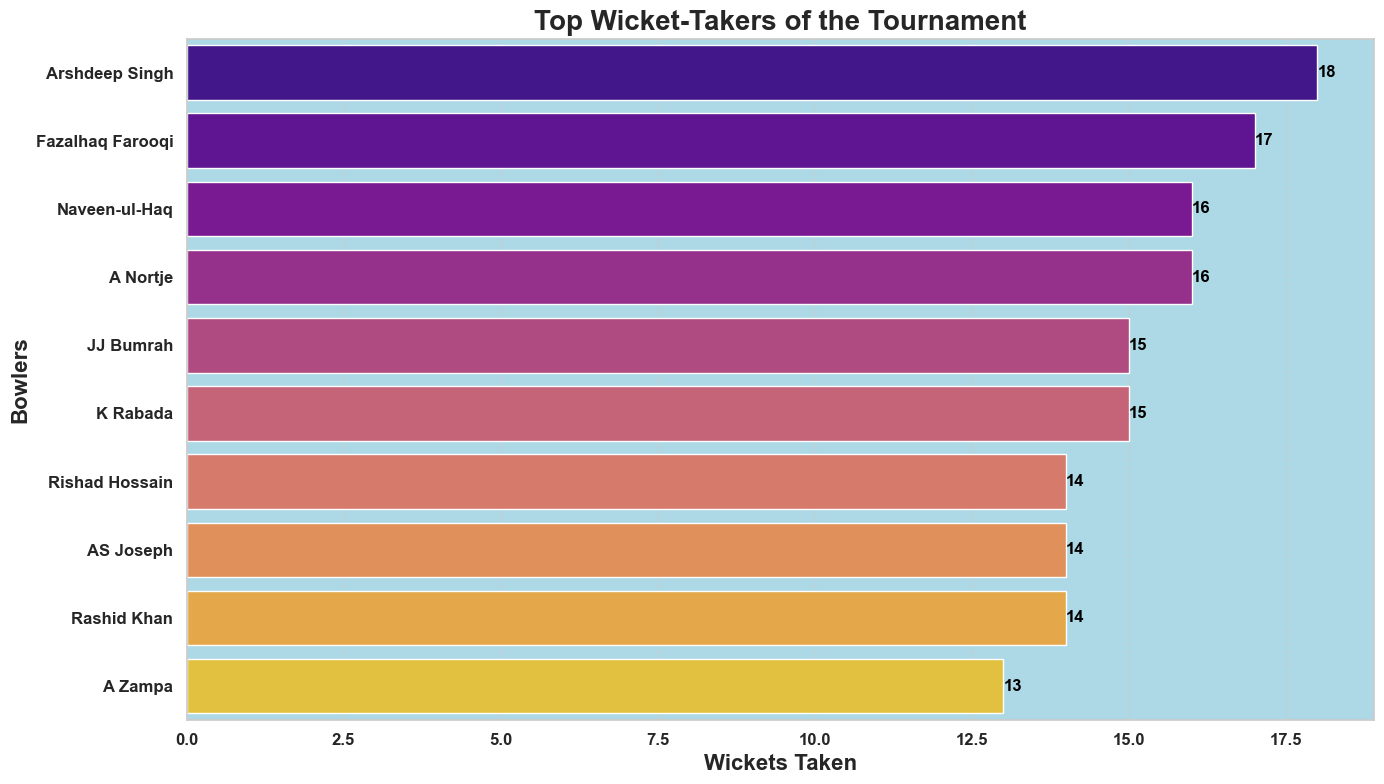

In [30]:
top_wicket_takers = deliveries[deliveries['wicket_type'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

barplot = sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='plasma')
plt.title('Top Wicket-Takers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Wickets Taken', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(top_wicket_takers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

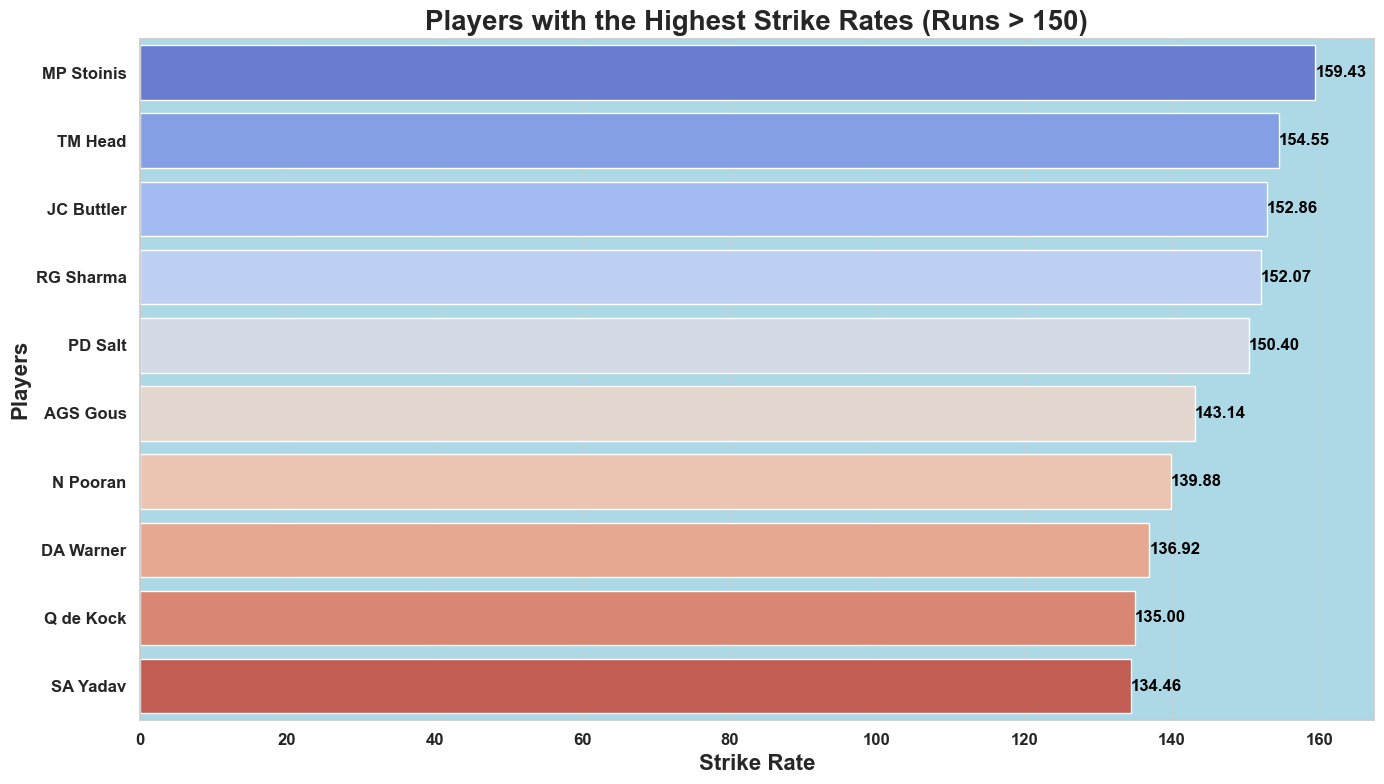

In [31]:
balls_faced = deliveries.groupby('striker').size()
runs_scored = deliveries.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100

filtered_strike_rate = strike_rate[runs_scored > 150]

top_strike_rates = filtered_strike_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

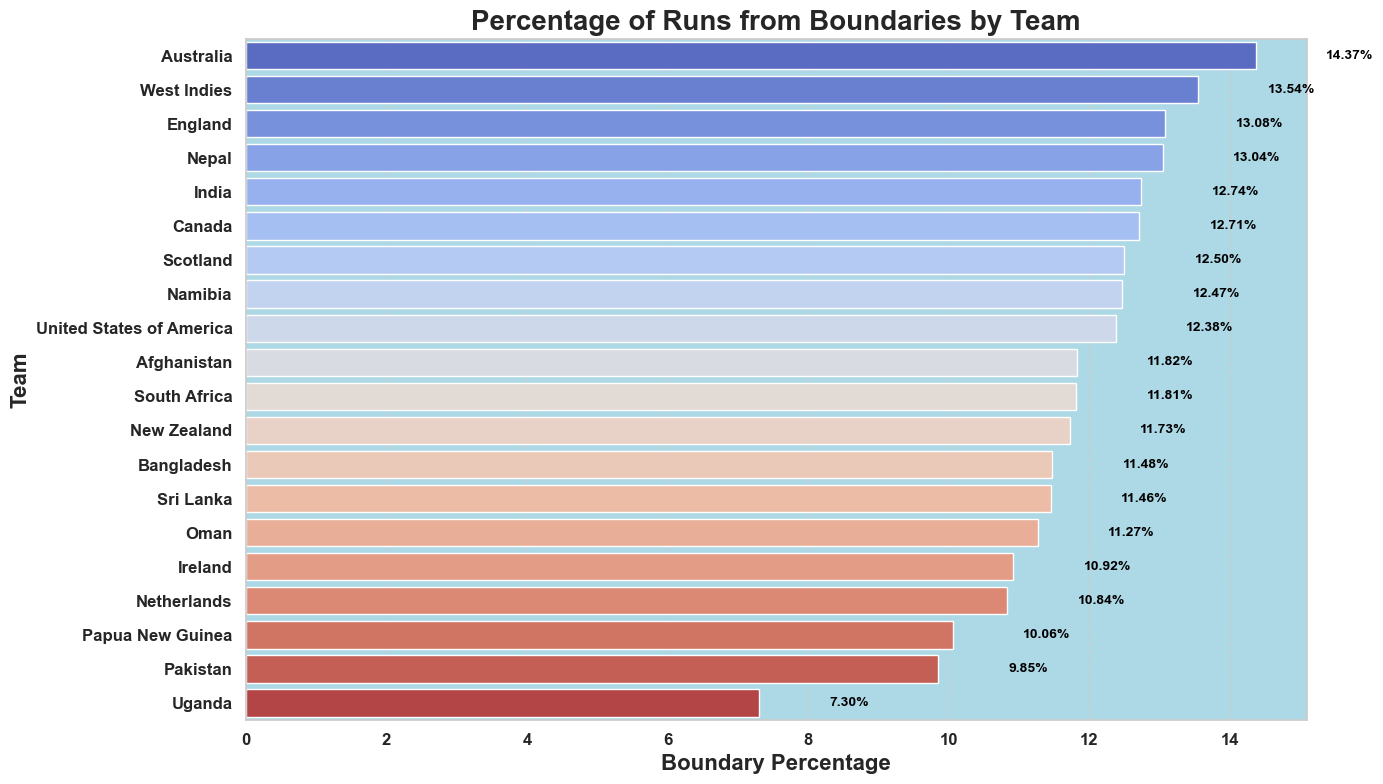

In [32]:
boundaries = deliveries[deliveries['runs_off_bat'].isin([4, 6])]
team_boundaries = boundaries.groupby('batting_team').size()
team_total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()

boundary_percentage = (team_boundaries / team_total_runs) * 100

boundary_percentage = boundary_percentage.reset_index()
boundary_percentage.columns = ['batting_team', 'boundary_percentage']
boundary_percentage = boundary_percentage.sort_values(by='boundary_percentage', ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=boundary_percentage, x='boundary_percentage', y='batting_team', palette='coolwarm')
plt.title('Percentage of Runs from Boundaries by Team', fontsize=20, weight='bold')
plt.xlabel('Boundary Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(boundary_percentage['boundary_percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

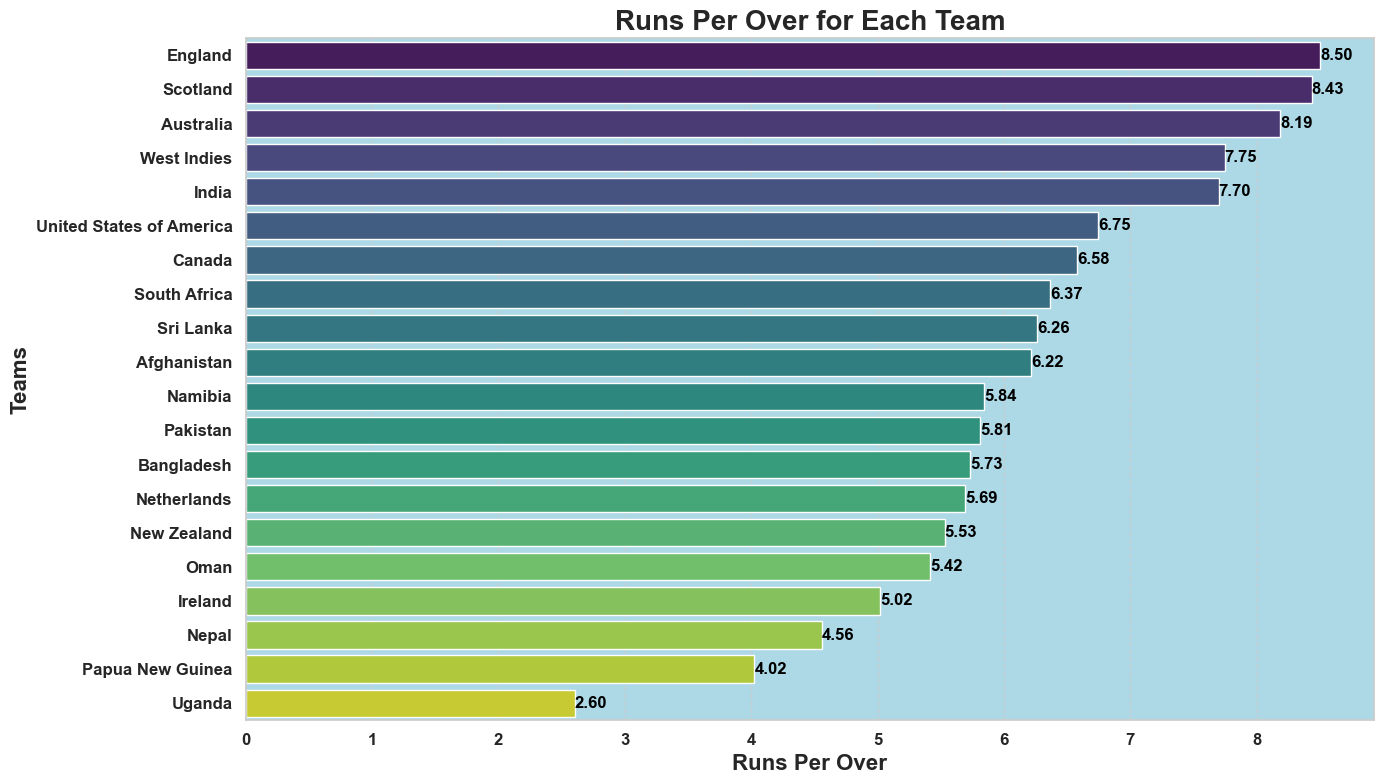

In [33]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()
team_balls = deliveries.groupby('batting_team').size()

runs_per_over = team_runs / (team_balls / 6)
most_runs_per_over = runs_per_over.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=most_runs_per_over.values, y=most_runs_per_over.index, palette='viridis')
plt.title('Runs Per Over for Each Team', fontsize=20, weight='bold')
plt.xlabel('Runs Per Over', fontsize=16, weight='bold')
plt.ylabel('Teams', fontsize=16, weight='bold')

for index, value in enumerate(most_runs_per_over.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


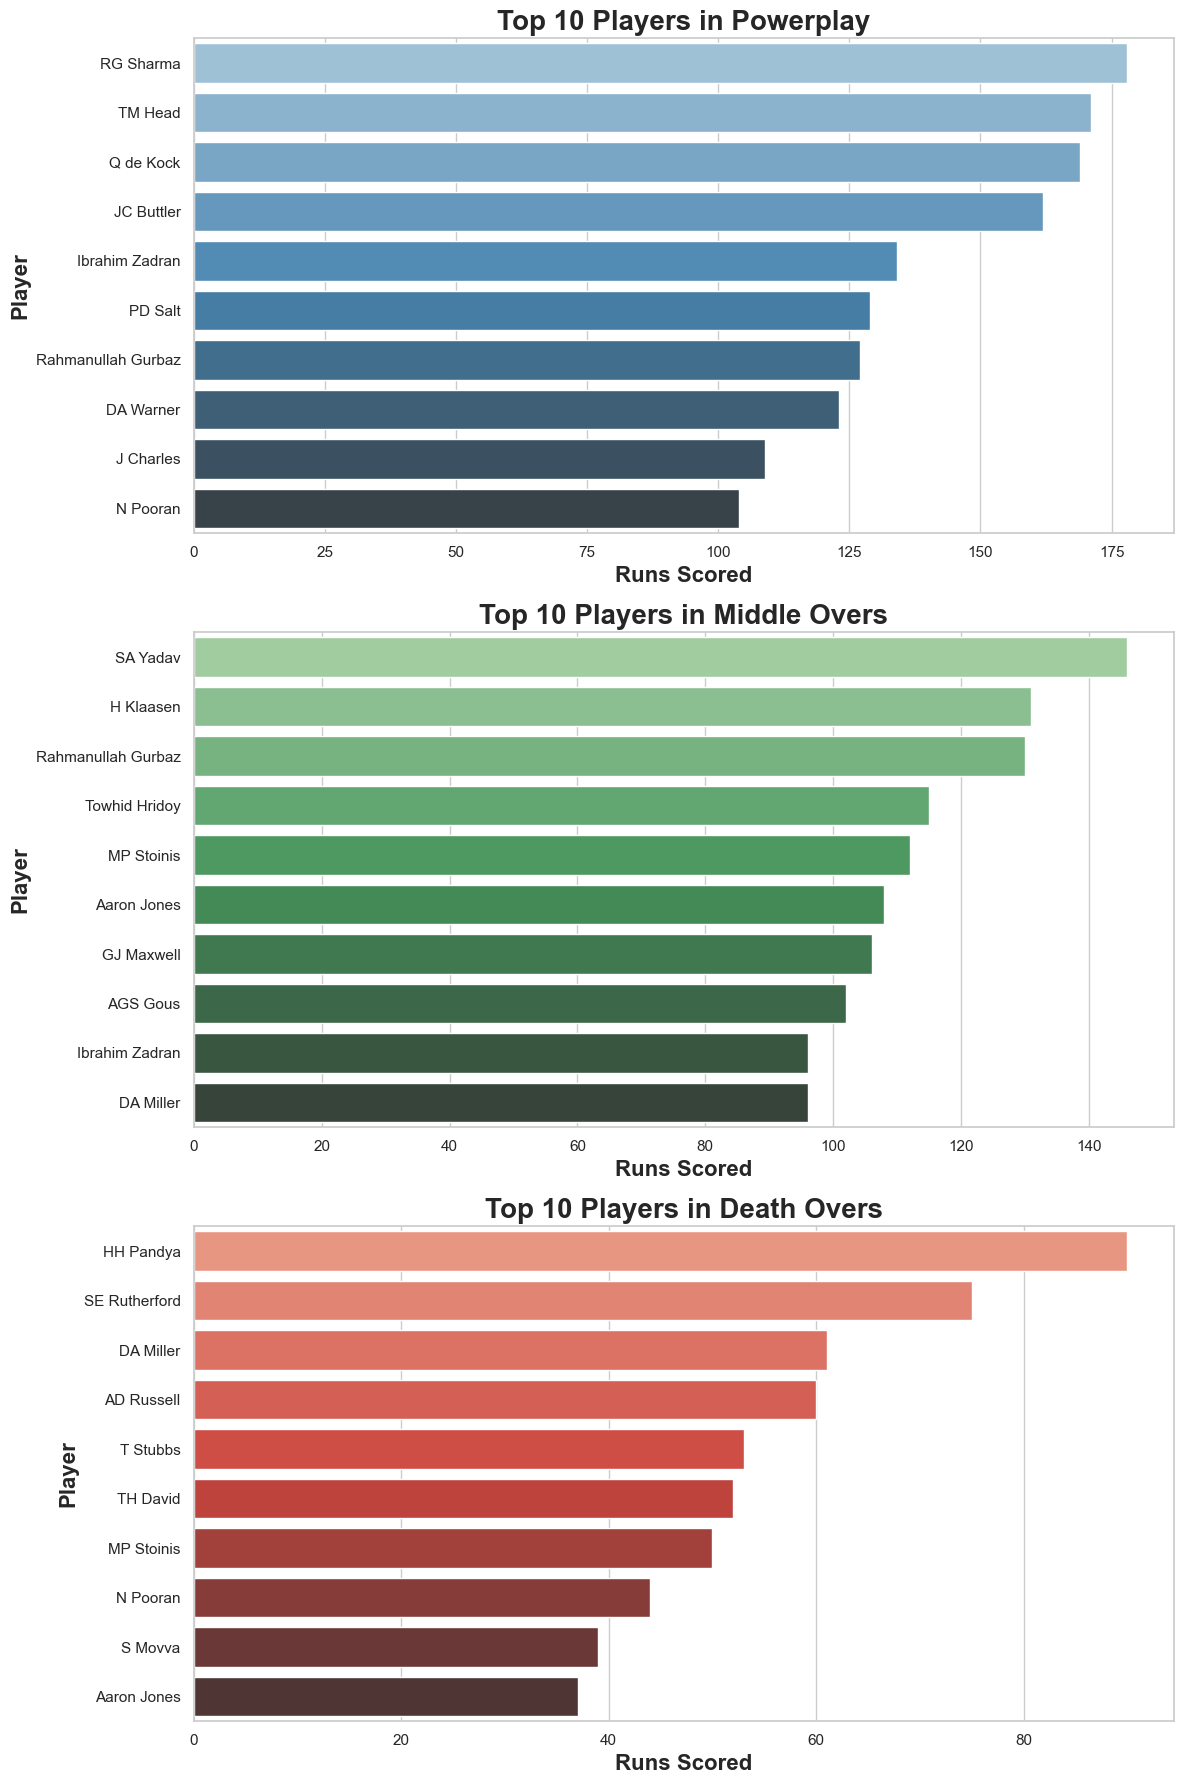

In [34]:
powerplay = deliveries[deliveries['ball'].between(0.1, 6.6)]
middle_overs = deliveries[deliveries['ball'].between(7.1, 15.6)]
death_overs = deliveries[deliveries['ball'].between(16.1, 20.6)]

powerplay_performance = powerplay.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
middle_overs_performance = middle_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
death_overs_performance = death_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
sns.set_style(style="whitegrid")

top10_powerplay = powerplay_performance.head(10).sort_values(ascending=False)
top10_middle_overs = middle_overs_performance.head(10).sort_values(ascending=False)
top10_death_overs = death_overs_performance.head(10).sort_values(ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=top10_powerplay.values, y=top10_powerplay.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Players in Powerplay', fontsize=20, weight='bold')
axes[0].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[0].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_middle_overs.values, y=top10_middle_overs.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Players in Middle Overs', fontsize=20, weight='bold')
axes[1].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[1].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_death_overs.values, y=top10_death_overs.index, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top 10 Players in Death Overs', fontsize=20, weight='bold')
axes[2].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[2].set_ylabel('Player', fontsize=16, weight='bold')

plt.tight_layout()

plt.show()

In [35]:
consistent_bowlers = deliveries[deliveries['wicket_type'].notnull()].groupby(['match_id', 'bowler']).size().groupby('bowler').mean().sort_values(ascending=False).head(10)
consistent_bowlers = consistent_bowlers.reset_index().rename(columns={"bowler": "Bowler", 0: 'Consistency in Economy'})
consistent_bowlers

,Bowler,Consistency in Economy
0,K Bhurtel,4.000000
1,Imad Wasim,3.000000
2,J Miyaji,3.000000
3,NP Kenjige,3.000000
4,OC McCoy,3.000000
5,S Lamichhane,3.000000
6,Fazalhaq Farooqi,2.833333
7,Rashid Khan,2.800000
8,CJ Jordan,2.750000
9,T Shamsi,2.750000


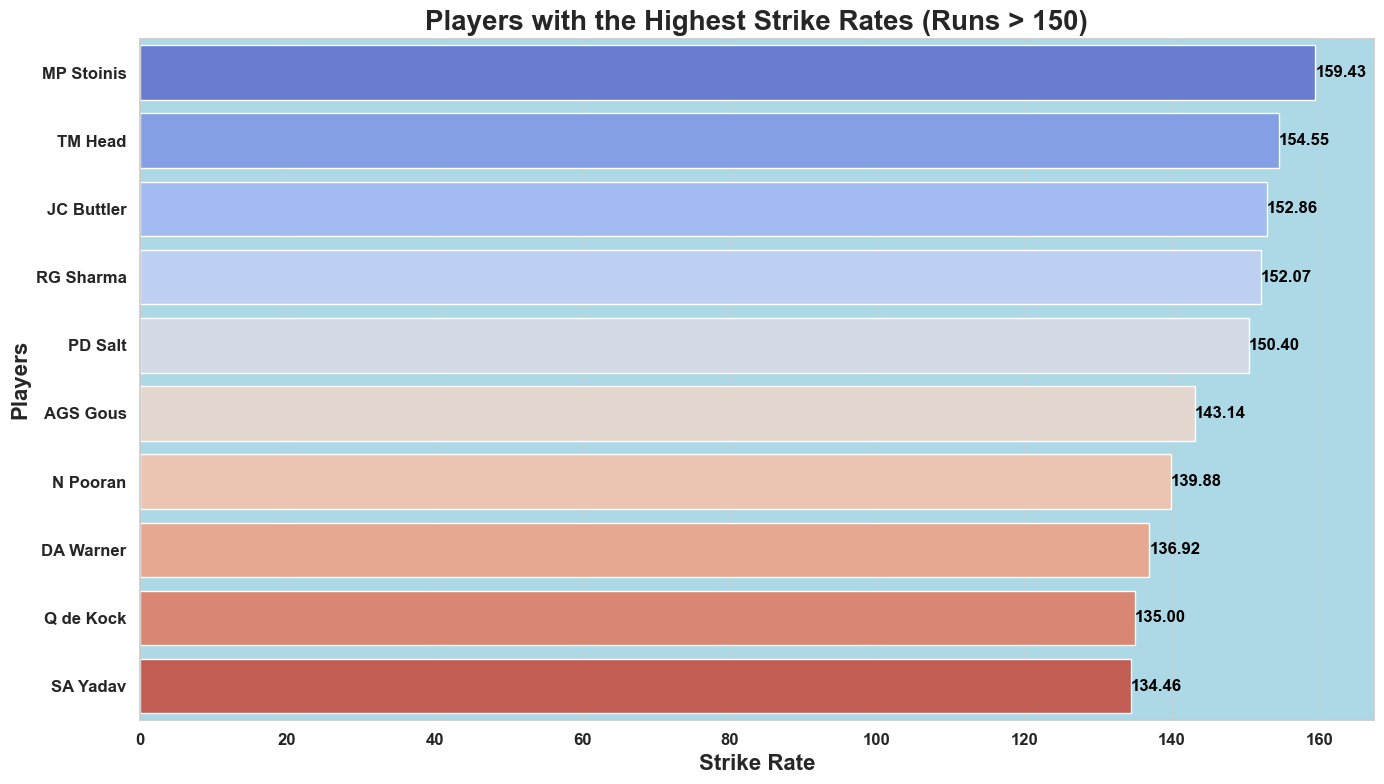

In [36]:
balls_faced = deliveries.groupby('striker').size()
runs_scored = deliveries.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100

filtered_strike_rate = strike_rate[runs_scored > 150]

top_strike_rates = filtered_strike_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()
